In [11]:
import numpy as np
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.layers import Dropout
from sklearn.decomposition import PCA
import time
import random

In [12]:
data_name = ["./vb_data.npy", "./md1_data.npy", "./md2_data.npy",
             "./cp_data.npy"]

test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
epoch_num = 500
T = 0

for i in range(4):
    X_test=np.load(data_name[i])
    m1=np.load(data_name[(i + 1) % 4])
    m2=np.load(data_name[(i + 2) % 4])
    m3=np.load(data_name[(i + 3) % 4])
    X_train=np.vstack((m1,m2,m3))

    y_train=X_train[:,-1]
    X_train=X_train[:,:-1]
    y_test=X_test[:,-1]
    X_test=X_test[:,:-1]

    for j in range(1000):
        n = random.randint(0, len(X_train) - 1)
        m = random.randint(0, len(X_train[0]) - 1)
        X_train[n][m] = np.mean(X_train[:, m])

    k = 144
    # U,sigma,VT = np.linalg.svd(X_train)
    # sigma = [x * x for x in sigma]
    # sigma_sum = sum(sigma)
    # percentage = 0.99
    # k = 1
    # s = 0
    # while k <= len(sigma):
    #     s += sigma[k - 1]
    #     if s > sigma_sum * percentage:
    #         break
    #     k += 1
    # pca = PCA(n_components = k)
    # pca.fit(X_train)
    # X_train = pca.transform(X_train)
    # X_test = pca.transform(X_test)

    X_train = np.reshape(X_train, (X_train.shape[0], 1, k))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, k))
    X_test_list=[]
    y_test_list=[]

    one_hot_train_labels = to_categorical(y_train)
    one_hot_test_labels = to_categorical(y_test)
    X_test_list.append(X_test)
    y_test_list.append(one_hot_test_labels)

    T1 = time.process_time()

    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(1, k)))
    model.add(layers.LSTM(300))
    model.add(Dropout(0.2))
    model.add(layers.Dense(100,activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(5, activation='softmax'))


    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
    history = model.fit(X_train, one_hot_train_labels, epochs=epoch_num, batch_size=64, validation_data=(X_test, one_hot_test_labels))

    T2 = time.process_time()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_loss.append(loss)
    test_loss.append(val_loss)
    train_acc_1=history.history['accuracy']
    val_acc = history.history['val_accuracy']
    test_acc.append(val_acc)
    train_acc.append(train_acc_1)
    a=history.history['auc']
    b=history.history['val_auc']
    test_auc.append(b)
    train_auc.append(a)

    T = T + (T2 - T1)

Epoch 1/500
52/52 [==============================] - 2s 12ms/step - loss: 1.3870 - accuracy: 0.4248 - auc: 0.7360 - val_loss: 1.3371 - val_accuracy: 0.4341 - val_auc: 0.7721
Epoch 2/500
52/52 [==============================] - 0s 6ms/step - loss: 1.1753 - accuracy: 0.5009 - auc: 0.8197 - val_loss: 1.1379 - val_accuracy: 0.4865 - val_auc: 0.8336
Epoch 3/500
52/52 [==============================] - 0s 7ms/step - loss: 1.1163 - accuracy: 0.5105 - auc: 0.8367 - val_loss: 1.0312 - val_accuracy: 0.5713 - val_auc: 0.8656
Epoch 4/500
52/52 [==============================] - 0s 7ms/step - loss: 1.0529 - accuracy: 0.5382 - auc: 0.8553 - val_loss: 1.0474 - val_accuracy: 0.4955 - val_auc: 0.8578
Epoch 5/500
52/52 [==============================] - 0s 7ms/step - loss: 1.0390 - accuracy: 0.5424 - auc: 0.8592 - val_loss: 1.0781 - val_accuracy: 0.5749 - val_auc: 0.8502
Epoch 6/500
52/52 [==============================] - 0s 7ms/step - loss: 0.9985 - accuracy: 0.5584 - auc: 0.8697 - val_loss: 0.9315 - 

Testing Auc: 0.9924415051937103
Testing Accuracy: 0.9411101043224335
Testing Loss: 0.21949109435081482
Running Time: 750.015625 seconds


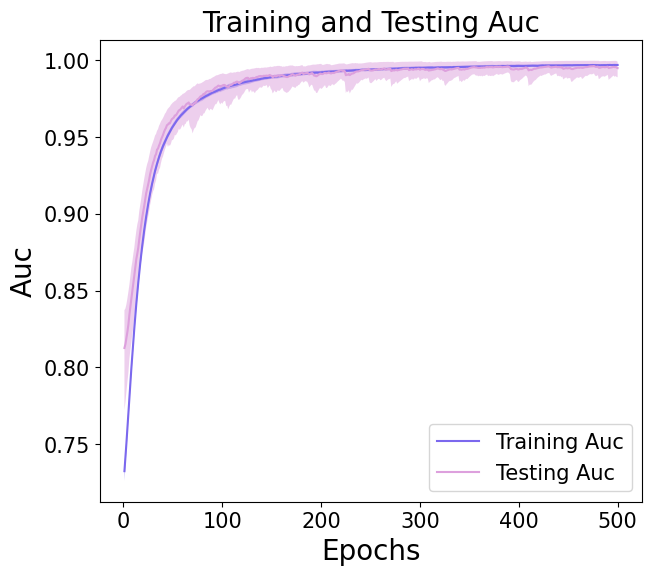

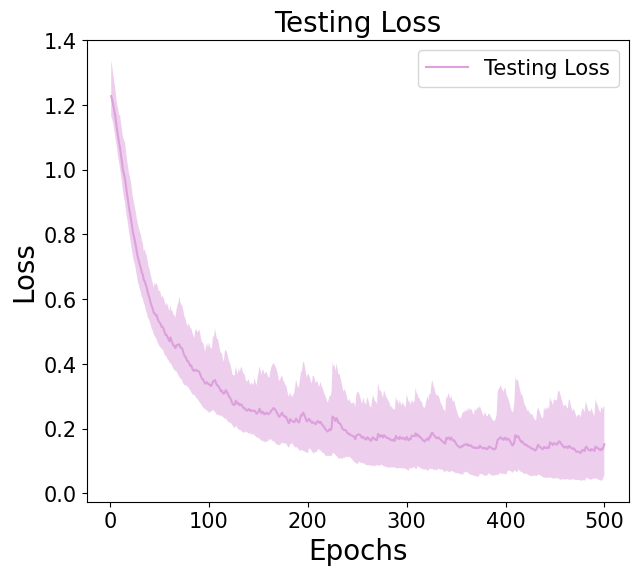

In [13]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

epochs = range(1, epoch_num + 1)
train_auc_min=[]
train_auc_max=[]
train_auc_mean=[]
for i in range(0, epoch_num):
    maxv=max(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i])
    minv=min(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i])
    meanv=(train_auc[0][i]+train_auc[1][i]+train_auc[2][i]+train_auc[3][i]) /4
    train_auc_min.append(minv)
    train_auc_max.append(maxv)
    train_auc_mean.append(meanv)

test_auc_min=[]
test_auc_max=[]
test_auc_mean=[]
for i in range(0, epoch_num):
    maxv=max(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i])
    minv=min(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i])
    meanv=(test_auc[0][i]+test_auc[1][i]+test_auc[2][i]+test_auc[3][i]) /4
    test_auc_min.append(minv)
    test_auc_max.append(maxv)
    test_auc_mean.append(meanv)

test_loss_min=[]
test_loss_max=[]
test_loss_mean=[]
for i in range(0, epoch_num):
    maxv=max(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i])
    minv=min(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i])
    meanv=(test_loss[0][i]+test_loss[1][i]+test_loss[2][i]+test_loss[3][i]) /4
    test_loss_min.append(minv)
    test_loss_max.append(maxv)
    test_loss_mean.append(meanv)

w = np.array([test_auc[0][epoch_num - 1],test_auc[1][epoch_num - 1],test_auc[2][epoch_num - 1],test_auc[3][epoch_num - 1]])
s=np.std(w)
meanv=np.mean(w)
wloss = np.array([test_loss[0][epoch_num - 1],test_loss[1][epoch_num - 1],test_loss[2][epoch_num - 1],test_loss[3][epoch_num - 1]])
meanvloss = np.mean(wloss)
wacu = np.array([test_acc[0][epoch_num - 1],test_acc[1][epoch_num - 1],test_acc[2][epoch_num - 1],test_acc[3][epoch_num - 1]])
meanvacu = np.mean(wacu)
print("Testing Auc:", meanv)
print("Testing Accuracy:", meanvacu)
print("Testing Loss:", meanvloss)
print("Running Time:", T, "seconds")

f=plt.figure(figsize=[7,6])
plt.plot(epochs, smooth_curve(train_auc_mean), color='mediumslateblue',label='Training Auc')
plt.fill_between(epochs, smooth_curve(train_auc_min), smooth_curve(train_auc_max), alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_auc_mean), color='plum',label='Testing Auc')
plt.fill_between(epochs, smooth_curve(test_auc_min), smooth_curve(test_auc_max), alpha=0.5, facecolor='plum')
plt.title('Training and Testing Auc',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Auc',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc = 4, fontsize=15)
plt.savefig('./LSTM_Auc_mis.png', dpi=600)
plt.show()

g=plt.figure(figsize=[7,6])
plt.plot(epochs, smooth_curve(test_loss_mean), color='plum',label='Testing Loss')
plt.fill_between(epochs, smooth_curve(test_loss_min), smooth_curve(test_loss_max), alpha=0.5, facecolor='plum')
plt.title('Testing Loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc = 1, fontsize=15)
plt.savefig('./LSTM_Loss_mis.png', dpi=600)
plt.show()

In [14]:
X_test=np.load(data_name[0])
m1=np.load(data_name[1])
m2=np.load(data_name[2])
m3=np.load(data_name[3])
X_train=np.vstack((m1,m2,m3))

y_train=X_train[:,-1]
X_train=X_train[:,:-1]
y_test=X_test[:,-1]
X_test=X_test[:,:-1]
print(X_train)
print(len(X_train[0]))

X_train = np.reshape(X_train, (X_train.shape[0], 144, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 144, 1))

print(X_train)

[[0.24613 0.50185 0.50078 ... 0.49874 0.50048 0.19088]
 [0.43848 0.49882 0.49796 ... 0.49829 0.50098 0.50443]
 [0.50921 0.48926 0.49906 ... 0.50009 0.50006 0.50002]
 ...
 [0.38745 0.51547 0.50271 ... 0.51304 0.50236 0.42688]
 [0.36714 0.50046 0.49996 ... 0.50029 0.50221 0.39592]
 [0.50478 0.50088 0.49804 ... 0.49908 0.50036 0.53027]]
144
[[[0.24613]
  [0.50185]
  [0.50078]
  ...
  [0.49874]
  [0.50048]
  [0.19088]]

 [[0.43848]
  [0.49882]
  [0.49796]
  ...
  [0.49829]
  [0.50098]
  [0.50443]]

 [[0.50921]
  [0.48926]
  [0.49906]
  ...
  [0.50009]
  [0.50006]
  [0.50002]]

 ...

 [[0.38745]
  [0.51547]
  [0.50271]
  ...
  [0.51304]
  [0.50236]
  [0.42688]]

 [[0.36714]
  [0.50046]
  [0.49996]
  ...
  [0.50029]
  [0.50221]
  [0.39592]]

 [[0.50478]
  [0.50088]
  [0.49804]
  ...
  [0.49908]
  [0.50036]
  [0.53027]]]
